# Feature  Eng Approach

In [2]:
import numpy as np
import pandas as pd
np.random.seed(42)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in [0,9,13]:
    si = plt.style.available[i]
    plt.style.use(si)

In [4]:
red_df = pd.read_csv('../data/wine_quality/winequality-red.csv', sep=';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_df = pd.read_csv('../data/wine_quality/winequality-white.csv', sep=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


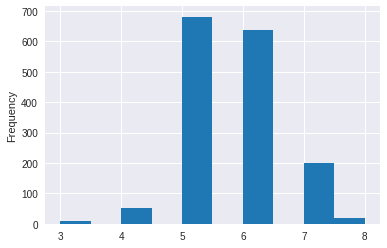

In [5]:
red_df.quality.plot.hist()

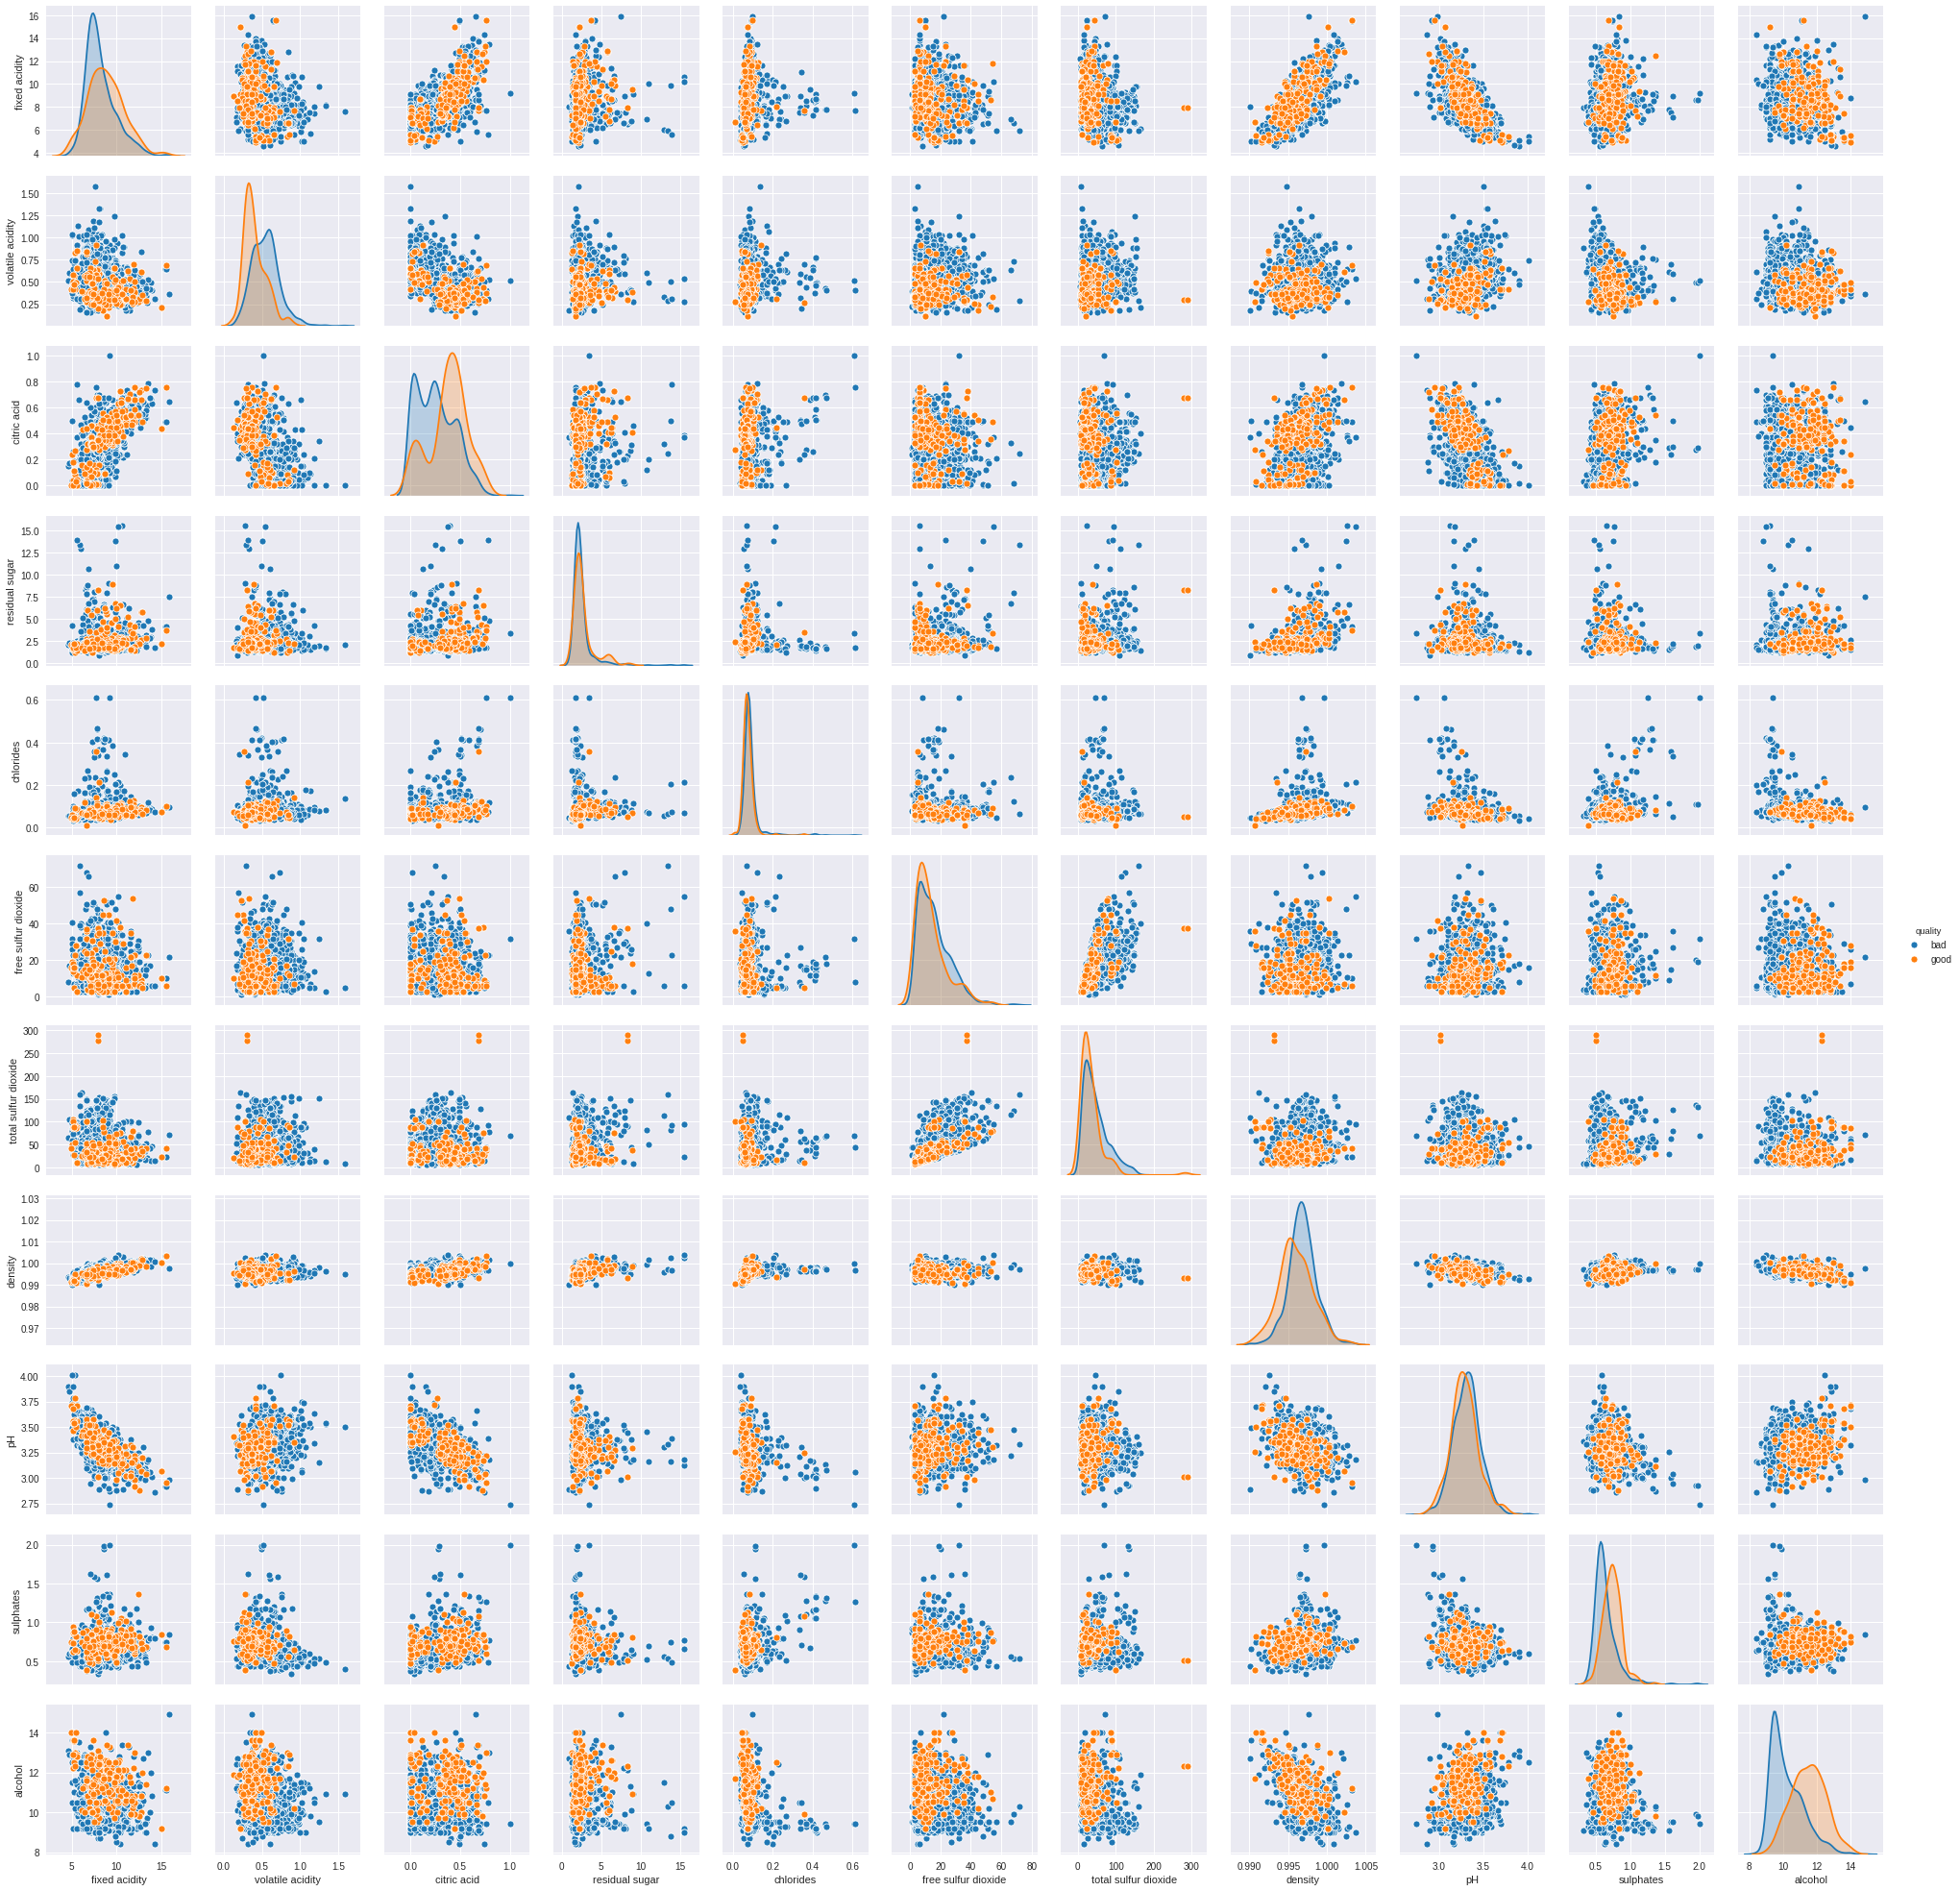

In [52]:
def to_bin(i):
    return "good" if int(i)>6.5 else "bad"

df = red_df.copy()
df.quality = df.quality.apply(to_bin)

sns.pairplot(df, hue='quality')

## Data Pre processing

In [74]:
def to_bin(i):
    return 1 if int(i)>6.5 else 0

red_y = red_df.quality.apply(to_bin)
red_x = red_df.drop(columns=['quality'])

white_y = white_df.quality.apply(to_bin)
white_x = white_df.drop(columns=['quality'])

In [75]:
def values2zscores(df):
    zdf = df.copy()
    for cname in df:
        mean, std = df[cname].mean(), df[cname].std()
        zdf[cname] = (df[cname] - mean)/std
        
    return zdf

red_z = values2zscores(red_x)
white_z = values2zscores(white_x)

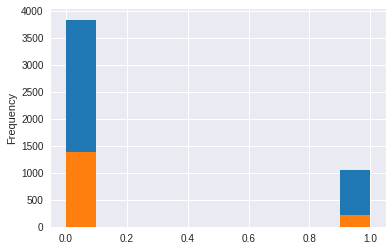

In [76]:
white_y.plot.hist()
red_y.plot.hist()

## Evaluate models

In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [78]:
rdf = RandomForestClassifier()
csvm_lin = svm.SVC(kernel='linear', C=1)
csvm_rbf = svm.SVC(kernel='rbf', C=1)
gnb = GaussianNB()

models = [
    ('Random Forest', rdf), 
    ('Linar SVM', csvm_lin),
    ('RBF SVM', csvm_rbf),
    ('GaussianNB', gnb)
]

In [79]:
for mname, model in models:
    red_c = cross_val_score(model, red_z, red_y, cv=5)
    white_c = cross_val_score(model, white_z, white_y, cv=5)
    print(f'{mname}:')
    print(f'\t[tred whine]  {np.mean(red_c)}\n\t[white whine] {np.mean(white_c)}')
    print(f'\t[mean cross]  {np.mean((red_c+white_c)/2)}')
#     print(f'\t{red_c, white_c}\n')

Random Forest:
	[tred whine]  0.8699166984052578
	[white whine] 0.7954226511850909
	[mean cross]  0.8326696747951743
Linar SVM:
	[tred whine]  0.8567700856453676
	[white whine] 0.7835850826541035
	[mean cross]  0.8201775841497356
RBF SVM:
	[tred whine]  0.869313176886493
	[white whine] 0.8033810010214506
	[mean cross]  0.8363470889539716
GaussianNB:
	[tred whine]  0.8074317132003243
	[white whine] 0.7245510829459465
	[mean cross]  0.7659913980731354


## COnfusion matrix

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
red_model = svm.SVC(kernel='rbf', C=1)
red_model.fit(red_z, red_y)
red_p = red_model.predict(red_z)

matrix = pd.DataFrame(confusion_matrix(red_y, red_p))
matrix

# plt.figure(figsize=(10,8))
# sns.heatmap(matrix,  annot=True)
# plt.ylabel('True')
# plt.xlabel('Pred');

,0,1
0,1363,19
1,143,74


In [88]:
white_model = svm.SVC(kernel='rbf', C=1)
white_model.fit(white_z, white_y)
white_p = white_model.predict(white_z)

matrix = pd.DataFrame(confusion_matrix(white_y, white_p))
matrix

# plt.figure(figsize=(10,8))
# sns.heatmap(matrix,  annot=True)
# plt.ylabel('True')
# plt.xlabel('Pred');

,0,1
0,3729,109
1,670,390


In [89]:
pred = white_model.predict(red_z)
matrix = pd.DataFrame(confusion_matrix(red_y, pred))
matrix

# plt.figure(figsize=(10,8))
# sns.heatmap(matrix,  annot=True)
# plt.ylabel('True')
# plt.xlabel('Pred');

,0,1
0,1286,96
1,158,59


In [90]:
pred = red_model.predict(white_z)
matrix = pd.DataFrame(confusion_matrix(white_y, pred))
matrix

# plt.figure(figsize=(10,8))
# sns.heatmap(matrix,  annot=True)
# plt.ylabel('True')
# plt.xlabel('Pred');

,0,1
0,3783,55
1,1009,51


## SVM with both red+white dataset

In [92]:
X = pd.concat([red_z, white_z])
Y = pd.concat([red_y, white_y])

In [93]:
model = svm.SVC(kernel='rbf', C=1)
model.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
matrix = pd.DataFrame(confusion_matrix(Y, model.predict(X)))
matrix

,0,1
0,5111,109
1,876,401


In [100]:
print(classification_report(Y, model.predict(X)))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91      5220
          1       0.79      0.31      0.45      1277

avg / total       0.84      0.85      0.82      6497

